In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
from ipywidgets import interactive


<IPython.core.display.Javascript object>


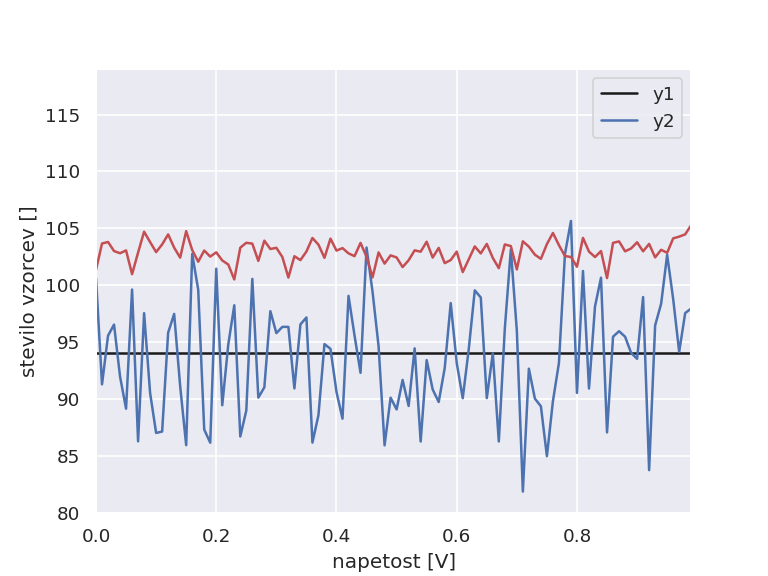

<IPython.core.display.Javascript object>


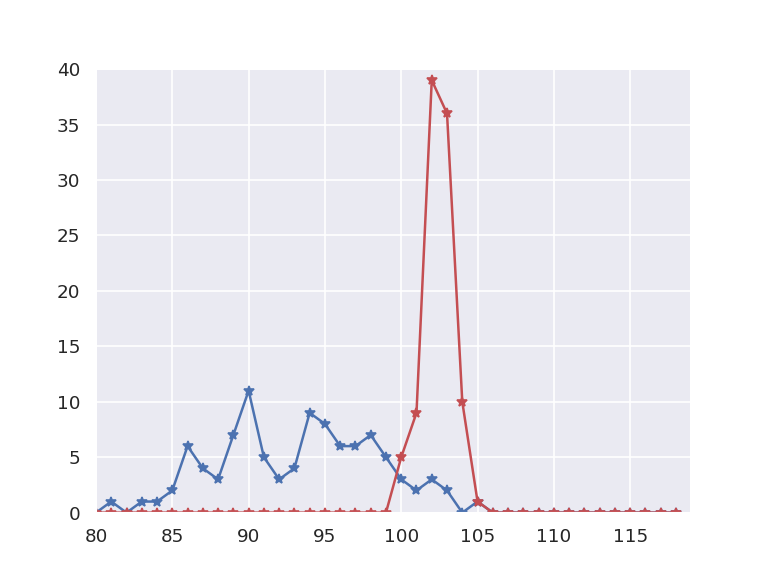

Box(children=(FloatSlider(value=1.0, description='Y2 standardna deviacija', max=10.0, min=1.0, step=1.0), Floa…

In [51]:
CONFIG_DRAW_HIST = 1

REF = 94
N = 100
HIST_BINS = range(80, 120, 1)
y2param = {
  'stddev': 1.0,
  'syserr': 1.0,
}

import ipywidgets as widgets
slider_y2stddev = widgets.FloatSlider(value=y2param['stddev'],
                         min=1.0,
                         max=10.0,
                         step=1.0,
                         description="Y2 standardna deviacija")
slider_y2stddev.main_data = 'stddev'
slider_y2syserr = widgets.FloatSlider(value=y2param['syserr'],
                         min=-10.0,
                         max=+10.0,
                         step=1.0,
                         description="Y2 sistemska napaka")
slider_y2syserr.main_data = 'syserr'

def on_value_change(change):
    # print(f'change={change}')
    obj = change.owner
    new_value = obj.value
    # print(f"new_value={new_value}")
    global y2param
    y2param[obj.main_data] = new_value
    # print(f"aa={obj.main_data} y2stddev={y2param['stddev']} y2syserr={y2param['syserr']}")
    draw()

def calc_data():
    ref = [REF]*N
    tt = np.linspace(0, 0.010*(N-1), N)
    y1 = np.random.normal(REF +  0, 5, N)
    y2 = np.random.normal(REF + y2param['syserr'], y2param['stddev'], N)
    return tt, ref, y1, y2
    
def draw():
    tt, ref, y1, y2 = calc_data()
    draw_time_series(tt, ref, y1, y2)
    if CONFIG_DRAW_HIST:
        draw_histogram(tt, ref, y1, y2)

def draw_time_series(tt, ref, y1, y2):
    global axA, lineA1, lineA2
    lineAr.set_data(tt, ref)
    lineA1.set_data(tt, y1)
    lineA2.set_data(tt, y2)
    axA.set_xlim(tt[0], tt[-1])
    axA.set_ylim(HIST_BINS[0], HIST_BINS[-1])
    axA.figure.canvas.draw_idle()
    
def draw_histogram(tt, ref, y1, y2):
    global axB, lineB1, lineB2
    hist1, bin_edges1 = np.histogram(y1, HIST_BINS)
    hist2, bin_edges2 = np.histogram(y2, HIST_BINS)
    lineB1.set_data(bin_edges1[:-1], hist1)
    lineB2.set_data(bin_edges2[:-1], hist2)
    axB.set_xlim(HIST_BINS[0], HIST_BINS[-1])
    axB.set_ylim(0, N*0.40)
    axB.figure.canvas.draw_idle()

plt.ion()
figA = plt.figure()
axA = figA.add_subplot(111)
lineAr, = axA.plot([0], [1], 'k-')    
lineA1, = axA.plot([0], [1], 'b-')    
lineA2, = axA.plot([0], [2], 'r-')
axA.set_xlabel('cas [s]')
axA.set_ylabel('napetost [V]')
axA.legend(['referenca', 'y1', 'y2'])


if CONFIG_DRAW_HIST:
    figB = plt.figure()
    axB = figB.add_subplot(111)
    lineB1, = axB.plot([0], [1], 'b*-')    
    lineB2, = axB.plot([0], [2], 'r*-')
    axA.set_xlabel('napetost [V]')
    axA.set_ylabel('stevilo vzorcev []')
    axA.legend(['y1', 'y2'])

draw()

slider_y2stddev.observe(on_value_change)
slider_y2syserr.observe(on_value_change)
items = [slider_y2stddev, slider_y2syserr]
box = widgets.Box(children=items)
box

